In [150]:
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [151]:
print(os.listdir())

['.conda', '.git', '.gitattributes', '.gitignore', '1 LEGO_Datasets.ipynb', 'colors.csv', 'demo.py', 'downloads_schema.png', 'inventories.csv', 'inventory_parts.csv', 'inventory_sets.csv', 'LICENSE.txt', 'markdown-diff', 'parts.csv', 'part_categories.csv', 'README.md', 'sets.csv', 'themes.csv']


## Creating the Panda dataframes

In [152]:
colors = pd.read_csv("colors.csv", dtype={'name': 'str', 'rgb': 'str'})
inventories = pd.read_csv("inventories.csv")
inventory_parts = pd.read_csv("inventory_parts.csv")
inventory_sets = pd.read_csv("inventory_sets.csv")
part_categories = pd.read_csv("part_categories.csv")
parts = pd.read_csv("parts.csv")
sets = pd.read_csv("sets.csv")
themes = pd.read_csv("themes.csv")

# LEGO color exploration


## This notebook explores the following:

* The most common lego colors of all time (1950 to 2017)
* How the colors included in sets have changed over time
* How the size of sets have changed over time

## Other ideas for this data set

* Track popular themes and by year
* What colors are associated with which themes? 
* Could you predict which theme a set is from just by the bricks it contains?
* What sets have the most-used pieces in them? What sets have the rarest pieces in them?

## Grouping the 135 indexed colors into 14 groups for simplified graphing

In [153]:
# Determine the number of rows in the colors index DataFrame
num_rows = colors.shape[0]
# Print the number of rows
print(f"The number of rows in the colors (index) DataFrame is {num_rows}.")

The number of rows in the colors (index) DataFrame is 135.


In [154]:
# Remove extraneous quotes
# Use the str.replace() method to remove the quotes, brackets, leading dashes from the name column

colors['name'] = colors['name'].str.replace(r'^["\']|["\']$', '', regex=True)
# regex=True: This argument is used to specify that the pattern is a regular expression.
# r'^["\']|["\']$': This is a regular expression pattern used to match specific characters at the beginning or end of the string.
# The ^ symbol matches the start of the string, and the $ symbol matches the end of the string.
# The pattern ["\'] matches either a single or double quote character.
# The | symbol is a logical OR operator that matches either the pattern before or after it.
# The regex pattern ^["\'] matches a single or double quote character at the beginning of the string.
# The regex pattern ["\']$ matches a single or double quote character at the end of the string.

# Remove leading dashes
# r "'-": This regular expression pattern matches a single quote followed by a dash character.
colors['name'] = colors['name'].str.replace(r"'-", '', regex=True)

colors['name'] = colors['name'].str.replace(r'[\[\]]', '', regex=True) #remove brackets
# Strip leading/trailing spaces
colors['name'] = colors['name'].str.strip()
# Replace 'f' with False and 't' with True
colors['is_trans'] = colors['is_trans'].replace({'f': False, 't': True})
# Define the mapping of color names to groups
color_groups = {
    'Red': 'Red',
    'Green': 'Green',
    'Blue': 'Blue',
    'Light Blue': 'Blue',
    'Dark Green': 'Green',
    'Medium Lavender': 'Purple',
    'Yellow': 'Yellow',
    'Orange': 'Orange',
    'Pink': 'Pink',
    'Unknown': 'Unknown\nWild Card',
    'Black': 'Black',
    'Dark Turquoise': 'Blue',
    'Medium Blue': 'Blue',
    'Tan': 'Brown',
    'Light Gray': 'Gray',
    'Dark Gray': 'Gray',
    'Brown': 'Brown',
    'White': 'White',
    'Purple': 'Purple',
    'Lime': 'Green',
    'Magenta': 'Pink',
    'Dark Pink': 'Pink',
    'Light Pink': 'Pink',
    'Bright Pink': 'Pink',
    'Lavender': 'Purple',
    'Sand Blue': 'Blue',
    'Sand Green': 'Green',
    'Sand Purple': 'Purple',
    'Sand Red': 'Red',
    'Sand Yellow': 'Yellow',
    'Dark Red': 'Red',
    'Medium Dark Pink': 'Pink',
    'Dark Brown': 'Brown',
    'Medium Azure': 'Blue',
    'Medium Blue': 'Blue',
    'Medium Green': 'Green',
    'Medium Lime': 'Green',
    'Medium Orange': 'Orange',
    'Medium Red': 'Red',
    'Medium Violet': 'Purple',
    'Medium Yellow': 'Yellow',
    'Bright Light Blue': 'Blue',
    'Bright Light Orange': 'Orange',
    'Bright Light Yellow': 'Yellow',
    'Bright Purple': 'Purple',
    'Bright Red': 'Red',
    'Bright Yellow': 'Yellow',
    'Light Aqua': 'Blue',
    'Light Green': 'Green',
    'Light Lime': 'Green',
    'Light Orange': 'Orange',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Turquoise': 'Blue',
    'Light Yellow': 'Yellow',
    'Olive Green': 'Green',
    'Very Light Bluish Gray': 'Gray',
    'Very Light Gray': 'Gray',
    'Very Light Orange': 'Orange',
    'Very Light Yellow': 'Yellow',
    'Dark Blue-Violet': 'Blue',
    'Dark Blue': 'Blue',
    'Dark Azure': 'Blue',
    'Dark Orange': 'Orange',
    'Dark Tan': 'Brown',
    'Dark Purple': 'Purple',
    'Dark Flesh': 'Brown',
    'Dark Salmon': 'Red',
    'Dark Yellow': 'Yellow',
    'Light Blue-Violet': 'Blue',
    'Light Bluish Gray': 'Gray',
    'Light Grayish Blue': 'Gray',
    'Light Grayish Orange': 'Orange',
    'Light Nougat': 'Brown',
    'Light Purple': 'Purple',
    'Light Salmon': 'Red',
    'Light Yellowish Orange': 'Yellow',
    'Medium Blue-Violet': 'Blue',
    'Medium Bluish Gray': 'Gray',
    'Medium Dark Flesh': 'Brown',
    'Medium Dark Pink': 'Pink',
    'Medium Lavender': 'Purple',
    'Medium Nougat': 'Brown',
    'Medium Purple': 'Purple',
    'Medium Reddish Brown': 'Brown',
    'Medium Violet': 'Purple',
    'Medium Yellowish Orange': 'Yellow',
    'Bright Bluish Green': 'Green',
    'Bright Bluish Violet': 'Blue',
    'Bright Green': 'Green',
    'Bright Orange': 'Orange',
    'Bright Purple': 'Purple',
    'Bright Reddish Violet': 'Red',
    'Bright Violet': 'Purple',
    'Bright Yellowish Green': 'Yellow',
    'Light Bluish Green': 'Green',
    'Light Bluish Violet': 'Blue',
    'Light Bright Blue': 'Blue',
    'Light Bright Green': 'Green',
    'Light Brown': 'Brown',
    'Trans-Yellow': 'Yellow',
    'Trans-Black IR Lens': 'Black',
    'Light': 'White',
    'Salmon': 'Red',
    'Light Violet': 'Purple',
    'Glow In Dark Opaque': 'White',
    'Dark Violet' : 'Purple',
    'Trans Flame Yellowish Orange': 'Orange',
    'Trans Fire Yellow': 'Yellow',
    'Trans Light Royal' : 'Blue',
    'Reddish Lilac': 'Purple',
    'No Color' : 'Black',
    'Trans-Dark': 'Black',
    'Trans-Green': 'Green',
    'Trans-Bright Green': 'Green',
    'Trans-Red': 'Red',
    'Trans-Black': 'Black',
    'Chrome Gold': 'Metallic',
    'Chrome Antique Brass': 'Metallic',
    'Chrome Black': 'Metallic',
    'Chrome Blue': 'Metallic',
    'Chrome Green': 'Metallic',
    'Chrome Pink': 'Metallic',
    'Chrome Silver': 'Metallic',
    'Fabuland Brown': 'Brown',
    'Glow in Dark White': 'White',
    'Trans-Light' : 'Clear',
    'Trans-Neon Green': 'Green',
    'Trans-Very Lt': 'Clear',
    'Trans-Dark Pink': 'Pink',
    'Trans-Clear': 'Clear',
    'Trans-Purple': 'Purple',
    'Trans-Neon Orange': 'Orange',
    'Chrome' : 'Metallic',
    'Reddish Brown': 'Brown',
    'Trans-Neon Yellow': 'Yellow',
    'Dark Bluish Gray': 'Gray',
    'Medium': 'Unknown\nWild Card',
    'Speckle Black-Copper': 'Metallic',
    'Speckle DBGray-Silver': 'Metallic',
    'Light Flesh': 'Pink',
    'Milky White': 'White',
    'Metallic Silver': 'Metallic',
    'Metallic Gold': 'Metallic',
    'Metallic Green': 'Metallic',
    'Metallic Gold' : 'Metallic',
    'Royal': 'Blue',
    'Flesh': 'Pink',
    'Violet': 'Purple',
    '-Violet': 'Purple',
    'Glitter Trans-Dark Pink': 'Pink',
    'Glitter Trans-Clear': 'Clear',
    'Aqua': 'Blue',
    'Glitter Trans-Purple': 'Purple',
    'Speckle Black-Silver': 'Metallic',
    'Speckle Black-Gold': 'Metallic',
    'Copper': 'Metallic',
    'Pearl Light Gray': 'Gray',
    'Metal': 'Metallic',
    'Pearl Light Gold': 'Metallic',
    'Trans-Medium': 'Unknown\nWild Card', 
    'Pearl Dark Gray': 'Gray',
    'Pearl Very Light Gray': 'Gray',
    'Flat Silver': 'Metallic',
    'Trans-Orange': 'Orange',
    'Pearl White': 'White',
    'Bright Light': 'White',
    'Rust': 'Brown',
    'Trans-Pink': 'Pink',
    'Sky': 'Blue',
    'Trans-Light Purple': 'Purple',
    'Dark': 'Unknown\nWild Card',
    'Glow In Dark Trans': 'Clear',
    'Pearl Gold': 'Metallic',
    'Maersk': 'Blue',
    'Earth Orange': 'Orange',
    'Sand': 'Yellow',
    'Glitter Trans-Light': 'Clear',
    'Yellowish Green': 'Green',
    'Flat Dark Gold': 'Metallic',
    'Glitter Trans-Neon Green': 'Green',
}

# Apply the mapping to create a new column 'color_group'
colors['color_group'] = colors['name'].map(color_groups)

# Check for unassigned names
unassigned_names = colors[colors['color_group'].isna()]

# Count how many have group as NaN
na_count = unassigned_names.shape[0]
print(f"Number of unassigned names : {na_count}")
print()

# Display unassigned names
if not unassigned_names.empty:
    print("Unassigned color names:")
    print(unassigned_names[['id', 'name']])
else:
    print("All color names have been assigned to a group.")

print(colors.head())

Number of unassigned names : 0

All color names have been assigned to a group.
   id            name     rgb  is_trans         color_group
0  -1         Unknown  0033B2     False  Unknown\nWild Card
1   0           Black  05131D     False               Black
2   1            Blue  0055BF     False                Blue
3   2           Green  237841     False               Green
4   3  Dark Turquoise  008F9B     False                Blue


In [155]:
# Count the number of unique names
unique_groups_count = colors['color_group'].nunique()

# Display the count of unique names
print(f"There are now {unique_groups_count} color groups")

There are now 14 color groups


## Adding Columns for Special Features: Translucent, Glow-in-the-Dark, Glitter

In [156]:
# Add a boolean column named Glitter to the colors DataFrame
colors['glitter'] = colors['name'].str.contains('glitter', case=False, na=False)
# Count the number of rows that contain True for the column Glitter
num_glitter_true = colors['glitter'].sum()


# Add a boolean column named Glow to the colors DataFrame
colors['glow'] = colors['name'].str.contains('glow', case=False, na=False)
# Count the number of rows that contain True for the column Glitter
num_glow_true = colors['glow'].sum()

# Count the number of rows that contain True for the column is_trans
num_is_trans_true = colors['is_trans'].sum()

# Display the counts
print(f"The number of rows in the color (index) df that contain:")
print(f"True for the column 'glitter': {num_glitter_true}.")
print(f"True for the column 'glow': {num_glow_true}.")
print(f"True for the column 'is_trans': {num_is_trans_true}.")


The number of rows in the color (index) df that contain:
True for the column 'glitter': 5.
True for the column 'glow': 3.
True for the column 'is_trans': 28.


## Merge the data frames colors, inventory_parts, inventories and sets so that colors can be tracked by year

In [157]:
# Merge inventory_parts with colors to get the color names
inventory_parts_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id')

# Merge inventory_parts_colors with inventories to get the set_num
inventory_parts_colors = inventory_parts_colors.merge(inventories, left_on='inventory_id', right_on='id')

# Merge the resulting DataFrame with sets to get the set details
merged_df = inventory_parts_colors.merge(sets, left_on='set_num', right_on='set_num')

# Inspect the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())
print()
print("Merged DataFrame Columns:")
print(merged_df.columns)

Merged DataFrame:
   inventory_id  part_num  color_id  quantity is_spare  id_x  \
0             1  48379c01        72         1        f    72   
1             1     48395         7         1        f     7   
2             1  mcsport6        25         1        f    25   
3             1    paddle         0         1        f     0   
4            22     15573        72         1        f    72   

             name_x     rgb  is_trans color_group  glitter   glow  id_y  \
0  Dark Bluish Gray  6C6E68     False        Gray    False  False     1   
1        Light Gray  9BA19D     False        Gray    False  False     1   
2            Orange  FE8A18     False      Orange    False  False     1   
3             Black  05131D     False       Black    False  False     1   
4  Dark Bluish Gray  6C6E68     False        Gray    False  False    22   

   version  set_num                                             name_y  year  \
0        1   7922-1  McDonald's Sports Set Number 6 - Orange Vest 

## Determining the range of years in the merged data frame

In [158]:
# Determine the range of years in the merged_df DataFrame
min_year = merged_df['year'].min()
max_year = merged_df['year'].max()

# Print the range of years
print(f"The data in the merged_df DataFrame is from {min_year} to {max_year}.")

The data in the merged_df DataFrame is from 1950 to 2017.


## Glitter, Glow, and Transparent Pieces

There are 36318 translucent pieces.
There are 101 glitter pieces.
There are 178 glow-in-the-dark pieces.


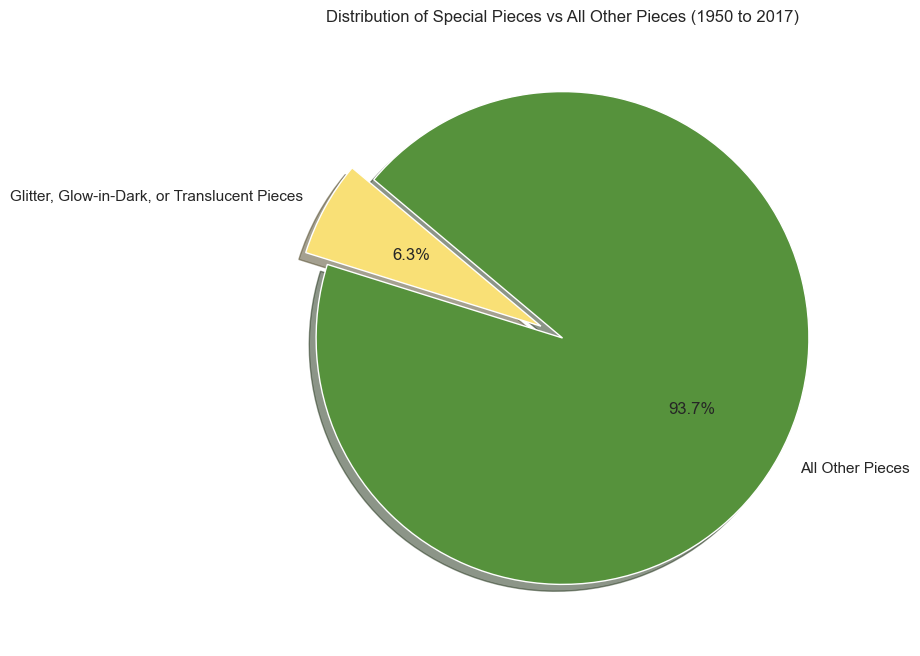

In [159]:
# Count the number of True values for each column
num_is_trans_true = merged_df['is_trans'].sum()
num_glitter_true = merged_df['glitter'].sum()
num_glow_true = merged_df['glow'].sum()

# Display the results
print(f"There are {num_is_trans_true} translucent pieces.")
print(f"There are {num_glitter_true} glitter pieces.")
print(f"There are {num_glow_true} glow-in-the-dark pieces.")

# Filter the DataFrame for pieces with glitter, glow, or is_trans
special_pieces = merged_df[(merged_df['is_trans']) | (merged_df['glitter']) | (merged_df['glow'])]

# Count the number of special pieces and other pieces
num_special_pieces = special_pieces.shape[0]
num_other_pieces = merged_df.shape[0] - num_special_pieces

# Create a pie chart
labels = ['Glitter, Glow-in-Dark, or Translucent Pieces', 'All Other Pieces']
sizes = [num_special_pieces, num_other_pieces]
colors = ['#F9E076', '#56923C']
explode = (0.1, 0)  # explode the first slice

# Apply Seaborn aesthetics
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Special Pieces vs All Other Pieces (1950 to 2017)')
plt.show()

In [160]:
# Find the first appearance of glow, glitter, and is_trans pieces
first_appearance_glow = merged_df[merged_df['glow'] == True]['year'].min()
first_appearance_glitter = merged_df[merged_df['glitter'] == True]['year'].min()
first_appearance_is_trans = merged_df[merged_df['is_trans'] == True]['year'].min()

# Display the results
print(f"Glow pieces first appear in {first_appearance_glow}.")
print(f"Glitter pieces first appear in {first_appearance_glitter}.")
print(f"Clear pieces first appear in {first_appearance_is_trans}.")

Glow pieces first appear in 1990.
Glitter pieces first appear in 1999.
Clear pieces first appear in 1950.


## Total number of pieces in each color group from 1950 to 2017

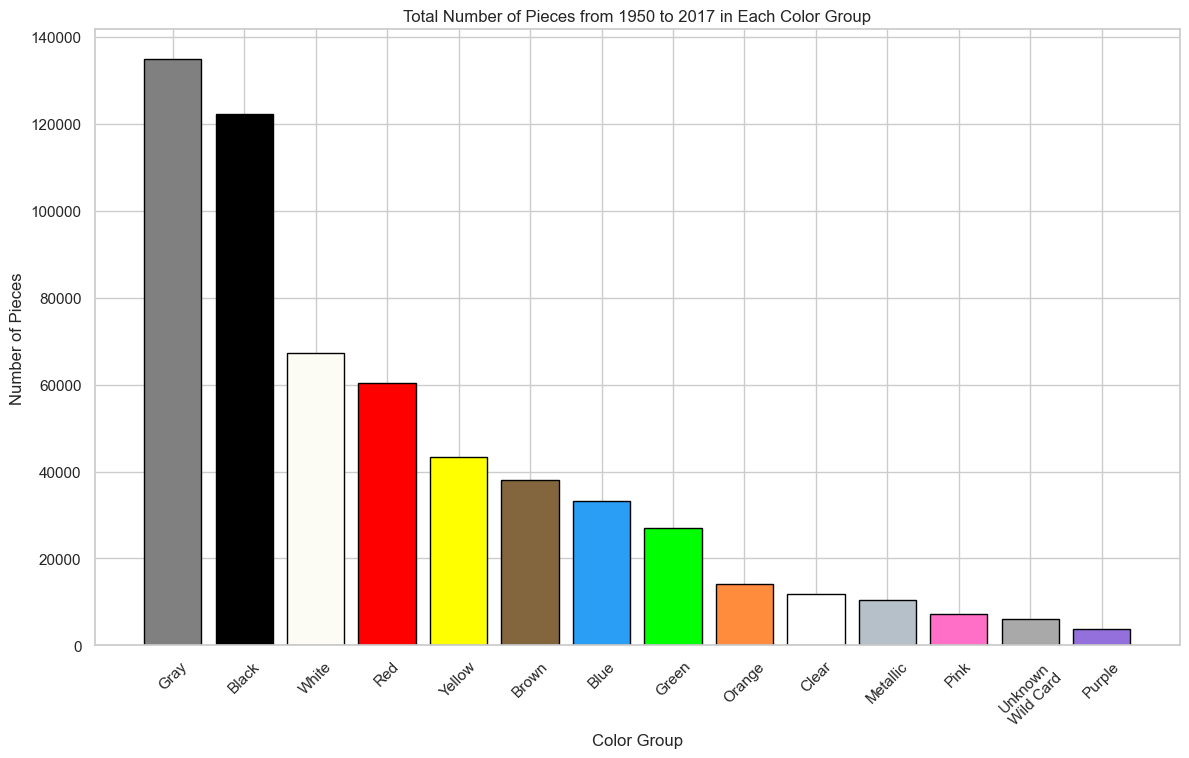

In [161]:
# Group the data by color group and sum the number of pieces
color_group_counts = merged_df['color_group'].value_counts()

# Define the color mapping for the bar colors
color_mapping = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFFF00',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#83653E',
    'Gray': '#808080',
    'White': '#FCFBF4',
    'Clear': '#FFFFFF',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9'
}

# Create a bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(color_group_counts.index, color_group_counts.values, color=[color_mapping.get(color_group, '#A9A9A9') for color_group in color_group_counts.index], edgecolor='black')

# Add labels and title
plt.xlabel('Color Group')
plt.ylabel('Number of Pieces')
plt.title('Total Number of Pieces from 1950 to 2017 in Each Color Group')
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

## Changes in Color Groups from 1950 to 2017

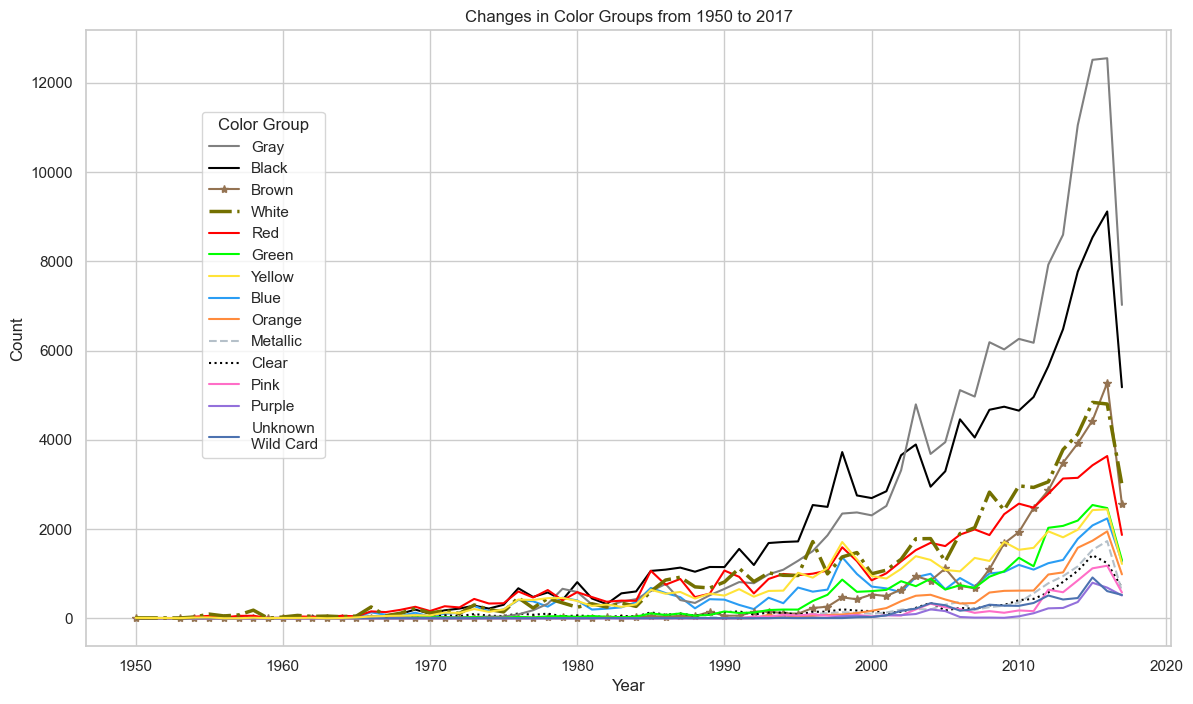

In [162]:
# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Define the color mapping for the LINES
color_mapping_lines = {
    
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#C0DFD3'
}

# Define the desired order of color groups in the legend
legend_order = ['Gray', 'Black', 'Brown', 'White', 'Red', 'Green', 'Yellow', 'Blue', 'Orange', 'Metallic', 'Clear', 'Pink', 'Purple', 'Unknown\nWild Card']

# Initialize the lines dictionary
lines = {}

# Plot the datagit commit -m "Update 1_LEGO_Datasets.ipynb with color group changes and bar chart"
plt.figure(figsize=(14, 8))
for color_group in color_group_counts.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle=':')
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle="-")
    else:
        line, = plt.plot(color_group_counts.index, color_group_counts[color_group], label=color_group, color=color_mapping_lines.get(color_group))
    lines[color_group] = line

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]
plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1950 to 2017')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Pink, Purple, Orange Pieces

In [163]:
# Find the first appearance of pink, purple, and orange pieces
first_appearance_pink = merged_df[merged_df['color_group'] == 'Pink']['year'].min()
first_appearance_purple = merged_df[merged_df['color_group'] == 'Purple']['year'].min()
first_appearance_orange = merged_df[merged_df['color_group'] == 'Orange']['year'].min()

# Display the results
print(f"Pink pieces first appear in {first_appearance_pink}.")
print(f"Purple pieces first appear in {first_appearance_purple}.")
print(f"Orange pieces first appear in {first_appearance_orange}.\n")

# Filter the merged_df DataFrame for orange pieces from 1950 to 1970
orange_pieces_1950_1970 = merged_df[(merged_df['color_group'] == 'Orange') & (merged_df['year'] >= 1950) & (merged_df['year'] <= 1970)]
# Count the occurrences of orange pieces from 1950 to 1970
total_orange_pieces_1950_1970 = orange_pieces_1950_1970.shape[0]
# Display the result
print(f"The total number of orange pieces from 1950 to 1970 is {total_orange_pieces_1950_1970}.")

# Filter the merged_df DataFrame for orange pieces
orange_pieces = merged_df[merged_df['color_group'] == 'Orange']
# Group by year and count the occurrences
orange_pieces_per_year = orange_pieces.groupby('year').size()
# Find the first year with at least 20 orange pieces
first_year_at_least_10_orange = orange_pieces_per_year[orange_pieces_per_year >= 10].index.min()
first_year_at_least_20_orange = orange_pieces_per_year[orange_pieces_per_year >= 20].index.min()

# Display the result
print(f"The first year with at least 10 orange pieces is {first_year_at_least_10_orange}.")
print(f"The first year with at least 20 orange pieces is {first_year_at_least_20_orange}.")

Pink pieces first appear in 1991.
Purple pieces first appear in 1994.
Orange pieces first appear in 1950.

The total number of orange pieces from 1950 to 1970 is 2.
The first year with at least 10 orange pieces is 1982.
The first year with at least 20 orange pieces is 1993.


## Changes in Color Groups from 1950 to 1970

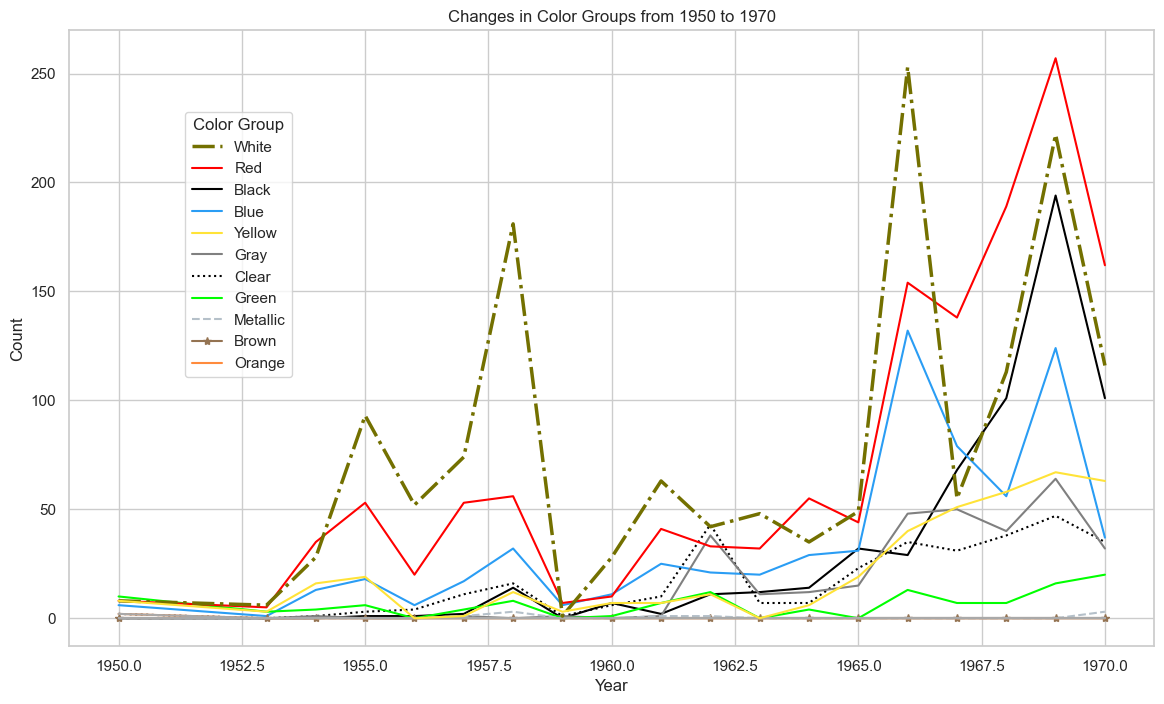

In [164]:
# Define the color mapping for the LINES
color_mapping_lines = {
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9'
}

# Define the desired order of color groups in the legend
legend_order = ['White', 'Red', 'Black', 'Blue', 'Yellow','Gray', 'Clear', 'Green', 'Metallic', 'Brown', 'Orange']

# Initialize the lines dictionary
lines = {}

# Filter data for the period 1950 to 1970
color_group_counts_1950_1970 = color_group_counts.loc[1950:1970]

# Plot the data for 1950 to 1970
plt.figure(figsize=(14, 8))
for color_group in color_group_counts_1950_1970.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts_1950_1970.index, color_group_counts_1950_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'Unknown Wild Card':
        line, = plt.plot(color_group_counts_1950_1970.index, color_group_counts_1950_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle='-.')
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts_1950_1970.index, color_group_counts_1950_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle=':')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts_1950_1970.index, color_group_counts_1950_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts_1950_1970.index, color_group_counts_1950_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle='-')
    else:
        line, = plt.plot(color_group_counts_1950_1970.index, color_group_counts_1950_1970[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'))
    lines[color_group] = line

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]
plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1950 to 1970')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Changes in Color Groups from 1971 to 1990

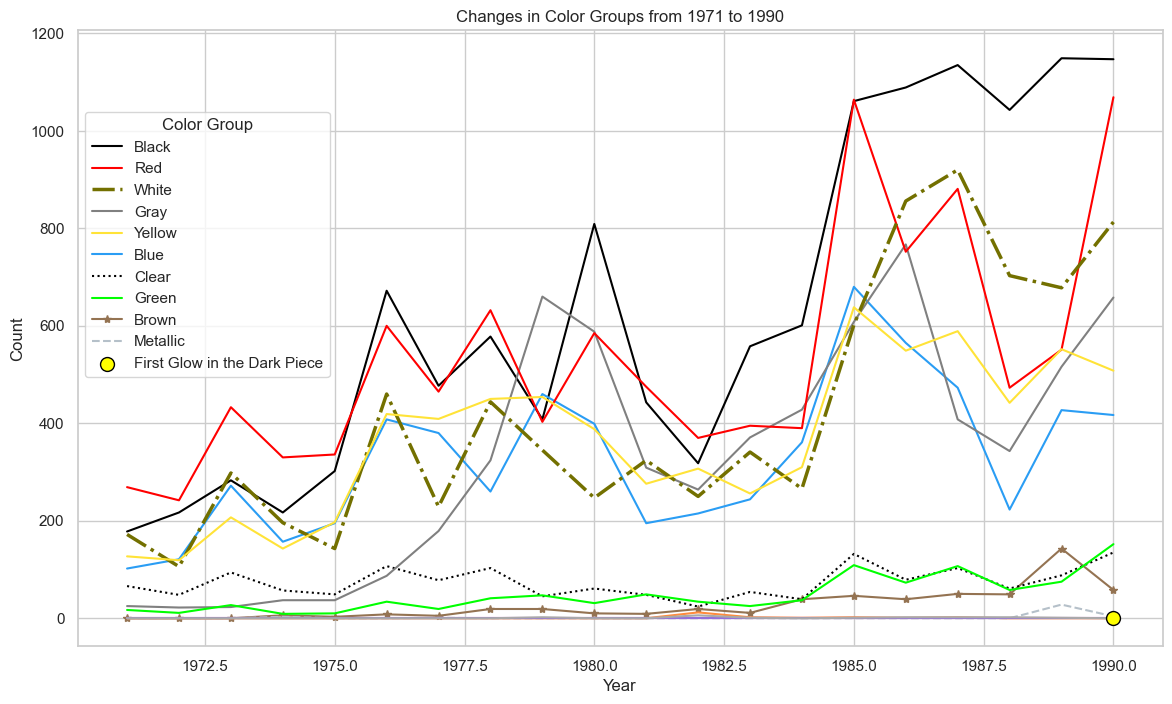

In [165]:
# Find the first appearance of glow pieces
first_appearance_glow = merged_df[merged_df['glow'] == True]['year'].min()

# Define the color mapping for the LINES
color_mapping_lines = {
    
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9',
    'Glow': '#FFFF00'  # Adding color for Glow
}

# Define the desired order of color groups in the legend
legend_order = ['Black', 'Red', 'White', 'Gray','Yellow', 'Blue', 'Clear', 'Green', 'Brown', 'Metallic']

# Initialize the lines dictionary for the second plot
lines = {}

# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Filter data for the period 1971 to 1990
color_group_counts_1971_1990 = color_group_counts.loc[1971:1990]

# Plot the data for 1971 to 1990
plt.figure(figsize=(14, 8))
for color_group in color_group_counts_1971_1990.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'Unknown Wild Card':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle='-.')
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle=':')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle='-')
    else:
        line, = plt.plot(color_group_counts_1971_1990.index, color_group_counts_1971_1990[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'))
    lines[color_group] = line

# Add a point for the first appearance of glow pieces
glow_scatter = plt.scatter(first_appearance_glow, 0, color=color_mapping_lines['Glow'], edgecolor='black', s=100, zorder=5, label='First Glow')

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]


# Add the scatter point to the legend
handles.append(glow_scatter)
labels.append('First Glow in the Dark Piece')

plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0, .88), loc='upper left')

plt.title('Changes in Color Groups from 1971 to 1990')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Changes in Color Groups from 1990 to 2017

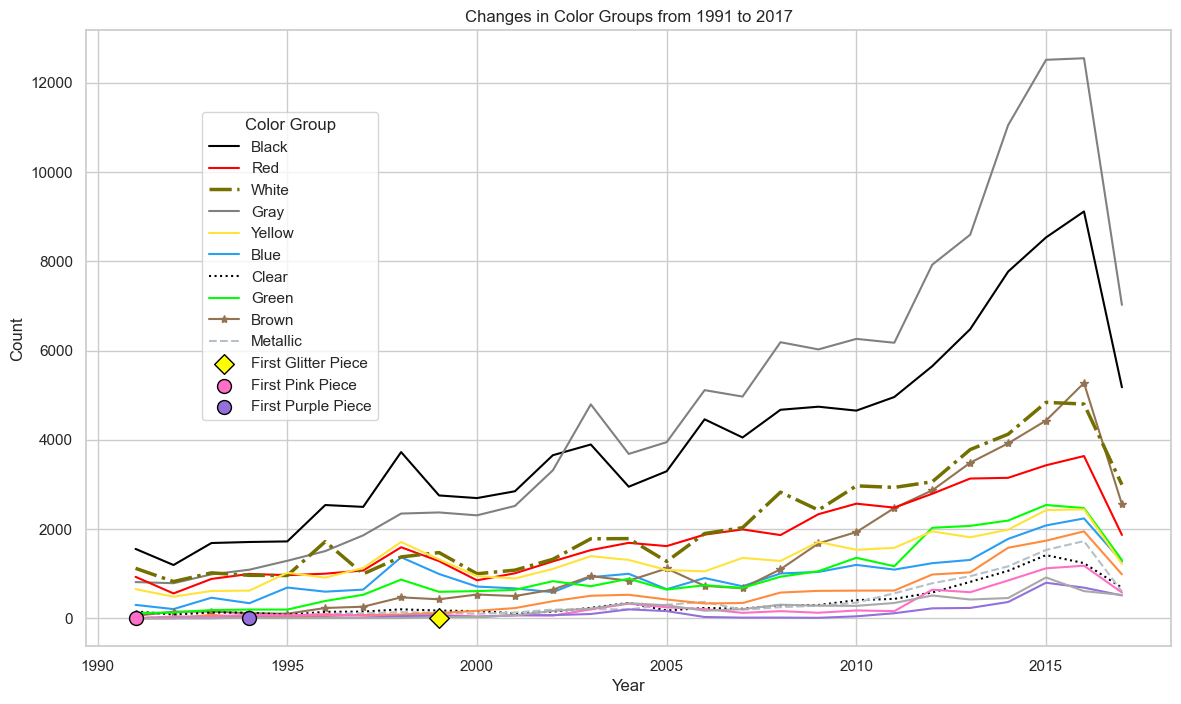

In [166]:
# Find the first appearance of pink, purple, and glitter pieces
first_appearance_pink = merged_df[merged_df['color_group'] == 'Pink']['year'].min()
first_appearance_purple = merged_df[merged_df['color_group'] == 'Purple']['year'].min()
first_appearance_glitter = merged_df[merged_df['glitter'] == True]['year'].min()

# Define the color mapping for the LINES
color_mapping_lines = {
    
    'Red': '#FF0000',
    'Green': '#00FF00',
    'Blue': '#2A9DF4',
    'Purple': '#9370DB',
    'Yellow': '#FFE338',
    'Orange': '#FF8B3D',
    'Pink': '#FF6EC7',
    'Black': '#000000',
    'Brown': '#947352',
    'Gray': '#808080',
    'White': '#737000',
    'Clear': '#000000',
    'Metallic': '#B5C0C9',
    'Unknown Wild Card': '#A9A9A9',
    'Glitter': '#FFFF00'  # Adding color for Glitter
}

# Initialize the lines dictionary for the third plot
lines = {}

# Group the data by year and color group, and count the occurrences
color_group_counts = merged_df.groupby(['year', 'color_group']).size().unstack(fill_value=0)

# Filter data for the period 1991 to 2017
color_group_counts_1991_2017 = color_group_counts.loc[1991:2017]

# Plot the data for 1991 to 2017
plt.figure(figsize=(14, 8))
for color_group in color_group_counts_1991_2017.columns:
    if color_group == 'Metallic':
        line, = plt.plot(color_group_counts_1991_2017.index, color_group_counts_1991_2017[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='--')
    elif color_group == 'Unknown Wild Card':
        line, = plt.plot(color_group_counts_1991_2017.index, color_group_counts_1991_2017[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle='-.')
    elif color_group == 'Clear':
        line, = plt.plot(color_group_counts_1991_2017.index, color_group_counts_1991_2017[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'), linestyle=':')
    elif color_group == 'White':
        line, = plt.plot(color_group_counts_1991_2017.index, color_group_counts_1991_2017[color_group], label=color_group, color=color_mapping_lines.get(color_group), linestyle='-.', linewidth=2.5)
    elif color_group == 'Brown':
        line, = plt.plot(color_group_counts_1991_2017.index, color_group_counts_1991_2017[color_group], label=color_group, color=color_mapping_lines.get(color_group), marker='*', linestyle='-')
    else:
        line, = plt.plot(color_group_counts_1991_2017.index, color_group_counts_1991_2017[color_group], label=color_group, color=color_mapping_lines.get(color_group, '#A9A9A9'))
    lines[color_group] = line

# Add points for the first appearance of pink, purple, glitter pieces
pink_scatter = plt.scatter(first_appearance_pink, 0, color=color_mapping_lines['Pink'], edgecolor='black', s=100, zorder=5, label='First Pink Piece Introduced')
purple_scatter = plt.scatter(first_appearance_purple, 0, color=color_mapping_lines['Purple'], edgecolor='black', s=100, zorder=5, label='First Purple Piece Introduced')
glitter_scatter = plt.scatter(first_appearance_glitter, 0, color=color_mapping_lines['Glitter'], edgecolor='black', s=100, zorder=5, label='First Glitter Piece Introduced', marker="D")

# Create a custom legend with the desired order
handles = [lines[color_group] for color_group in legend_order if color_group in lines]
labels = [color_group for color_group in legend_order if color_group in lines]

# Add the scatter points to the legend
handles.append(glitter_scatter)
labels.append('First Glitter Piece')
handles.append(pink_scatter)
labels.append('First Pink Piece')
handles.append(purple_scatter)
labels.append('First Purple Piece')

plt.legend(handles, labels, title='Color Group', bbox_to_anchor=(0.1, .88), loc='upper left')

plt.title('Changes in Color Groups from 1991 to 2017')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Changes in the average number of pieces in LEGO sets over time

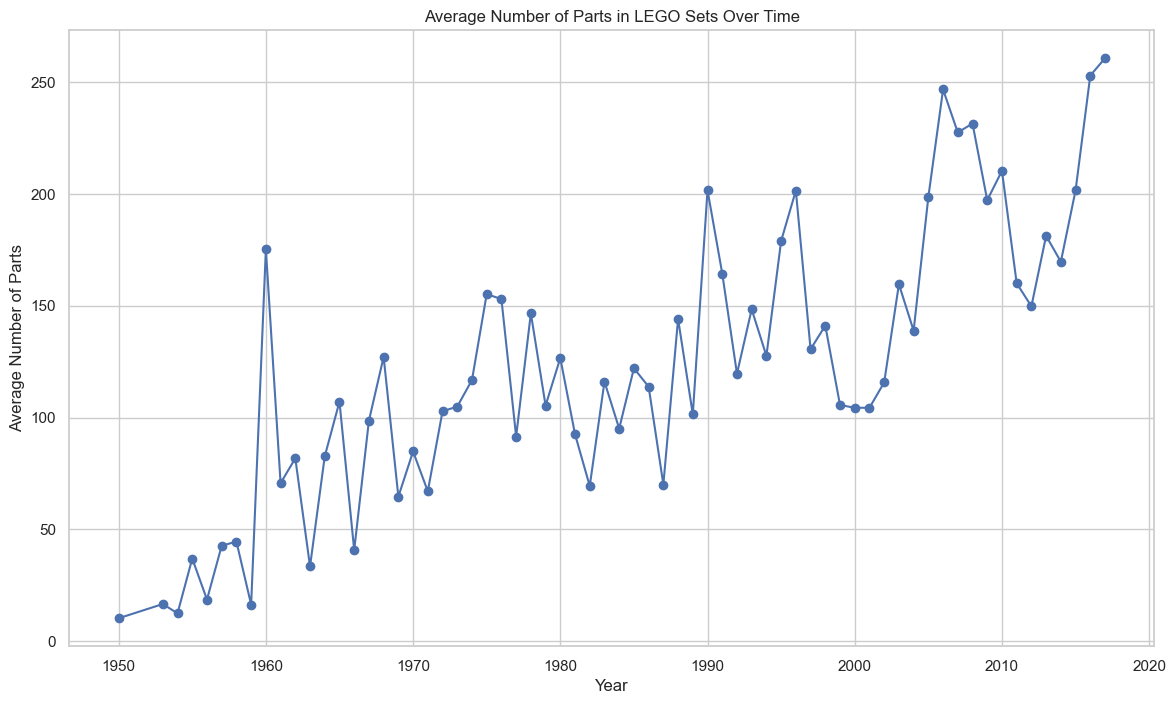

In [167]:
# Group the data by year and calculate the average number of parts per set
average_num_parts_per_year = sets.groupby('year')['num_parts'].mean()

# Plot the data
plt.figure(figsize=(14, 8))
plt.plot(average_num_parts_per_year.index, average_num_parts_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Average Number of Parts in LEGO Sets Over Time')
plt.xlabel('Year')
plt.ylabel('Average Number of Parts')
plt.grid(True)
plt.show()